In [1]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [2]:
from textblob import TextBlob
import pandas as pd

In [3]:
# Load the e-commerce store reviews dataset
reviews_df = pd.read_csv('ecommerce_reviews1.csv')

In [4]:
# Define a function to get the sentiment polarity of each review
def get_review_sentiment(review):
    # Create a TextBlob object for the review text
    blob = TextBlob(review)
    # Get the sentiment polarity of the review
    sentiment_polarity = blob.sentiment.polarity
    # Classify the sentiment polarity as positive, negative, or neutral
    if sentiment_polarity > 0:
        return 'positive'
    elif sentiment_polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [5]:
# Apply the sentiment analysis function to each review in the dataset
reviews_df['sentiment'] = reviews_df['review_text'].apply(get_review_sentiment)

In [6]:
# Print the number of positive, negative, and neutral reviews
print('Positive reviews:', len(reviews_df[reviews_df['sentiment'] == 'positive']))
print('Negative reviews:', len(reviews_df[reviews_df['sentiment'] == 'negative']))
print('Neutral reviews:', len(reviews_df[reviews_df['sentiment'] == 'neutral']))

Positive reviews: 3
Negative reviews: 2
Neutral reviews: 2


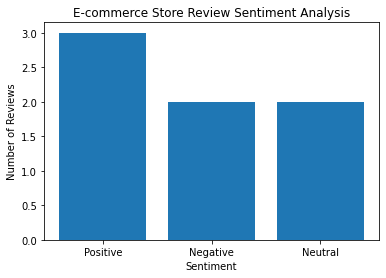

In [7]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral reviews
positive_reviews = len(reviews_df[reviews_df['sentiment'] == 'positive'])
negative_reviews = len(reviews_df[reviews_df['sentiment'] == 'negative'])
neutral_reviews = len(reviews_df[reviews_df['sentiment'] == 'neutral'])

# Create a bar chart of the review sentiments
plt.bar(['Positive', 'Negative', 'Neutral'], [positive_reviews, negative_reviews, neutral_reviews])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('E-commerce Store Review Sentiment Analysis')
plt.show()

In [8]:
# Create a dictionary of customer IDs and their corresponding sentiment values
customer_sentiments = {}
for index, row in reviews_df.iterrows():
    if row['customer_id'] not in customer_sentiments:
        customer_sentiments[row['customer_id']] = []
    customer_sentiments[row['customer_id']].append(row['sentiment'])

# Print the customer IDs and their corresponding sentiment values
for customer_id, sentiments in customer_sentiments.items():
    print('Customer ID:', customer_id)
    print('Sentiments:', sentiments)

Customer ID: 10001
Sentiments: ['positive']
Customer ID: 10002
Sentiments: ['positive']
Customer ID: 10003
Sentiments: ['positive']
Customer ID: 10004
Sentiments: ['negative']
Customer ID: 10005
Sentiments: ['neutral']
Customer ID: 10006
Sentiments: ['neutral']
Customer ID: 10007
Sentiments: ['negative']


In [6]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 254.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 243.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 317.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from platform import python_version

In [3]:
python_version()

'3.8.13'

In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from transformers import pipeline

# Load the e-commerce store reviews dataset
reviews_df = pd.read_csv('ecommerce_reviews1.csv')

# Load the BERT-based sentiment analysis model
model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Define a function to get the sentiment of each review using the BERT model
def get_review_sentiment(review):
    # Use the BERT model to predict the sentiment of the review
    sentiment = model(review)[0]
    # Return the sentiment label
    return sentiment['label']

# Apply the sentiment analysis function to each review in the dataset
reviews_df['sentiment'] = reviews_df['review_text'].apply(get_review_sentiment)

# Create a dictionary of customer IDs and their corresponding sentiment values
customer_sentiments = {}
for index, row in reviews_df.iterrows():
    if row['customer_id'] not in customer_sentiments:
        customer_sentiments[row['customer_id']] = []
    customer_sentiments[row['customer_id']].append(row['sentiment'])

# Print the customer IDs and their corresponding sentiment values
for customer_id, sentiments in customer_sentiments.items():
    print('Customer ID:', customer_id)
    print('Sentiments:', sentiments)

Customer ID: 10001
Sentiments: ['4 stars']
Customer ID: 10002
Sentiments: ['5 stars']
Customer ID: 10003
Sentiments: ['1 star']
Customer ID: 10004
Sentiments: ['1 star']
Customer ID: 10005
Sentiments: ['1 star']
Customer ID: 10006
Sentiments: ['5 stars']
Customer ID: 10007
Sentiments: ['1 star']


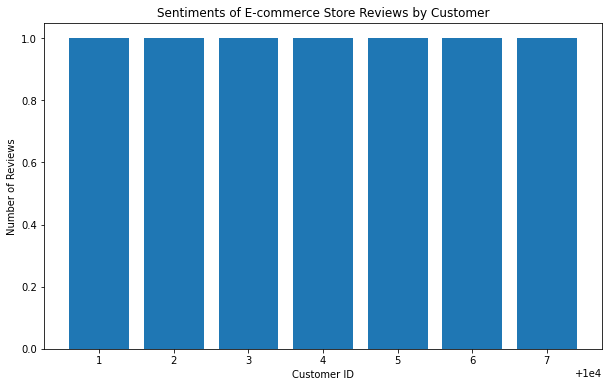

In [10]:
import matplotlib.pyplot as plt

# Create a bar chart of the sentiments for each customer
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(customer_sentiments.keys(), [len(sentiments) for sentiments in customer_sentiments.values()])
ax.set_xlabel('Customer ID')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiments of E-commerce Store Reviews by Customer')
plt.show()

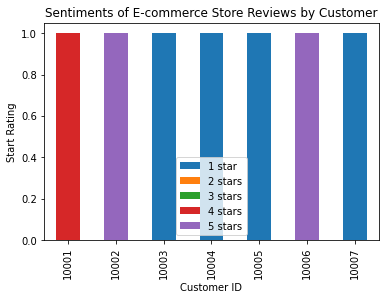

In [16]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Load the e-commerce store reviews dataset
reviews_df = pd.read_csv('ecommerce_reviews1.csv')

# Load the BERT-based sentiment analysis model
model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Define a function to get the sentiment of each review using the BERT model
def get_review_sentiment(review):
    # Use the BERT model to predict the sentiment of the review
    sentiment = model(review)[0]
    # Return the sentiment label
    return sentiment['label']

# Apply the sentiment analysis function to each review in the dataset
reviews_df['sentiment'] = reviews_df['review_text'].apply(get_review_sentiment)

# Create a dictionary to store the sentiment counts for each customer
customer_sentiments = {}
sentiment_values = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Initialize the sentiment count for each customer to zero
for customer_id in reviews_df['customer_id'].unique():
    customer_sentiments[customer_id] = {sentiment: 0 for sentiment in sentiment_values}

# Count the number of reviews for each sentiment for each customer
for index, row in reviews_df.iterrows():
    customer_id = row['customer_id']
    sentiment = row['sentiment']
    customer_sentiments[customer_id][sentiment] += 1

# Convert the dictionary to a pandas DataFrame
customer_sentiments_df = pd.DataFrame(customer_sentiments).T

# Plot the sentiment count chart
ax = customer_sentiments_df.plot(kind='bar', stacked=True)

ax.set_xlabel('Customer ID')
ax.set_ylabel('Start Rating')
ax.set_title('Sentiments of E-commerce Store Reviews by Customer')
ax.legend()
plt.show()
